# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35, random_state=8)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,272,91,43,88,157,61,9,149,45,19,157,165,326,140,64,1,26,197,207
1,228,105,54,106,215,68,10,208,32,24,166,217,640,218,69,14,23,189,199
2,22,94,43,64,173,69,7,150,43,19,142,169,344,177,68,9,1,199,206
3,49,91,45,79,176,59,9,163,40,20,148,184,404,179,62,0,10,199,208
4,333,86,42,65,125,54,7,150,45,19,140,171,327,172,85,2,8,180,182
5,370,96,41,77,177,64,5,177,36,21,134,205,485,148,74,0,4,196,198
6,549,107,51,103,182,56,11,213,31,24,162,226,673,217,72,2,4,188,198
7,421,98,48,101,195,61,11,207,31,23,152,227,650,193,71,5,7,189,196
8,811,83,39,69,127,54,5,135,49,18,131,155,274,162,69,16,6,187,190
9,745,85,43,69,141,62,7,152,44,19,145,178,341,179,84,1,4,181,184


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,410.608379,93.621129,44.868852,81.868852,169.524590,61.879781,8.737705,168.544627,40.941712,20.553734,147.890710,188.673953,438.056466,175.041894,72.444444,6.622951,12.016393,189.061931,195.788707
std,241.254843,8.306975,6.196679,15.819613,33.707331,8.677943,5.260067,32.690602,7.739148,2.534314,14.768867,30.832921,172.842463,32.031635,7.949149,5.004186,8.928840,6.147799,7.383090
min,2.000000,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,112.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,205.000000,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,146.000000,33.000000,19.000000,136.000000,167.000000,318.000000,150.000000,67.000000,3.000000,5.000000,185.000000,191.000000
50%,411.000000,93.000000,44.000000,79.000000,169.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,367.000000,174.000000,71.000000,6.000000,10.000000,189.000000,197.000000
75%,611.000000,100.000000,50.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,216.000000,579.000000,198.000000,75.000000,10.000000,18.000000,193.000000,201.000000
max,845.000000,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,262.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Apply standardization to the training data
X_train_std = scaler.fit_transform(X_train)

# Apply the same transformation to the test data
X_test_std = scaler.transform(X_test)

In [7]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# Fit the label encoder
encoder.fit(target)

# Encode train and test labels
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

Standardization — это преобразование признаков таким образом, чтобы их среднее стало равно 0, а стандартное отклонение — 1.

Формула для преобразования признаков $X$:
$$Z=\frac{X-\mu}{\sigma}$$

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
import scipy.stats as stats
import scikitplot as skplt
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'

In [9]:
# Define the Logistic Regression Model
log_reg = LogisticRegression(multi_class='multinomial', 
                             solver='saga', 
                             tol=1e-3, 
                             max_iter=500, 
                             random_state=8)

In [10]:
warm_start = [True, False]
C = np.arange(0.01, 1, 0.01)
penalty = ['l1', 'l2']

param_dist = {
    'warm_start' : warm_start,
    'C' : C,
    'penalty': penalty
}

In [11]:
random_search = RandomizedSearchCV(log_reg, 
                                   param_distributions=param_dist, 
                                   n_iter=100, 
                                   scoring='accuracy', 
                                   cv=5, 
                                   random_state=8,
                                   n_jobs=-1
                                   )

In [12]:
# Fit the Model
random_search.fit(X_train_std, y_train)

RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(max_iter=500,
                                                multi_class='multinomial',
                                                random_state=8, solver='saga',
                                                tol=0.001),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'C': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.3...
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]),
                                        'penalty': ['l1', 'l2'],
                                        'warm_start': [True, False]},
                   random_state=8, scoring='accuracy')

In [13]:
best_model = random_search.best_estimator_
y_pred_train = best_model.predict(X_train_std)
y_pred_test = best_model.predict(X_test_std)

f1_train = f1_score(y_train, y_pred_train, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

random_search.best_params_, f1_train, f1_test, accuracy_train, accuracy_test
print(f"random search best params: \n{random_search.best_params_}\n")
print(f"f1 train: {f1_train}")
print(f"f1 test: {f1_test}")
print(f"accuracy train: {accuracy_train}")
print(f"accuracy test: {accuracy_test}")

random search best params: 
{'warm_start': False, 'penalty': 'l1', 'C': 0.9500000000000001}

f1 train: 0.8087746050624439
f1 test: 0.8053261865799166
accuracy train: 0.8105646630236795
accuracy test: 0.8080808080808081


На стандартизированных данных удалось достигнуть достаточно высокого значения accuracy 0.808 на train.

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

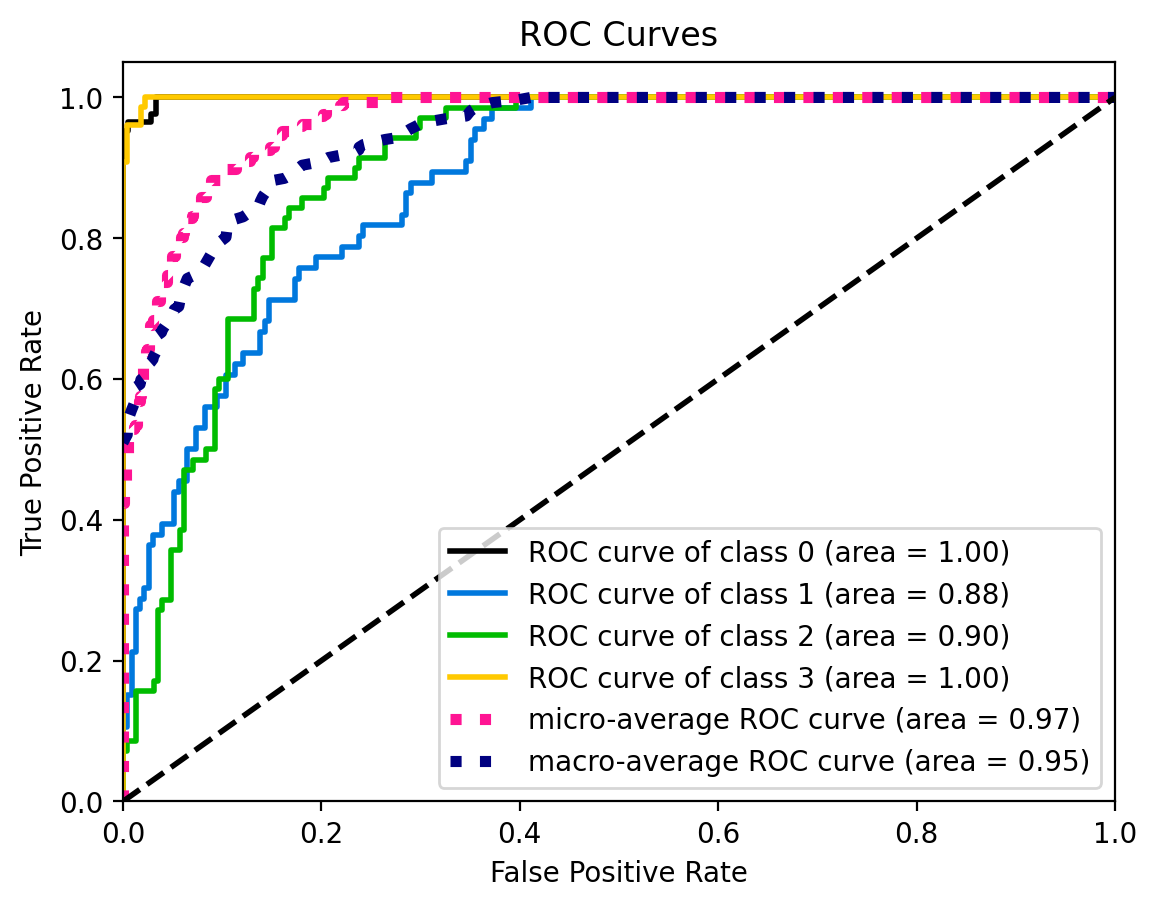

In [14]:
y_pred_proba = best_model.predict_proba(X_test_std)
skplt.metrics.plot_roc(y_test, y_pred_proba)

In [15]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [16]:
from sklearn.decomposition import PCA

In [17]:
pca = PCA(n_components=min(X_train_std.shape))
X_train_pca = pca.fit_transform(X_train_std)

In [18]:
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

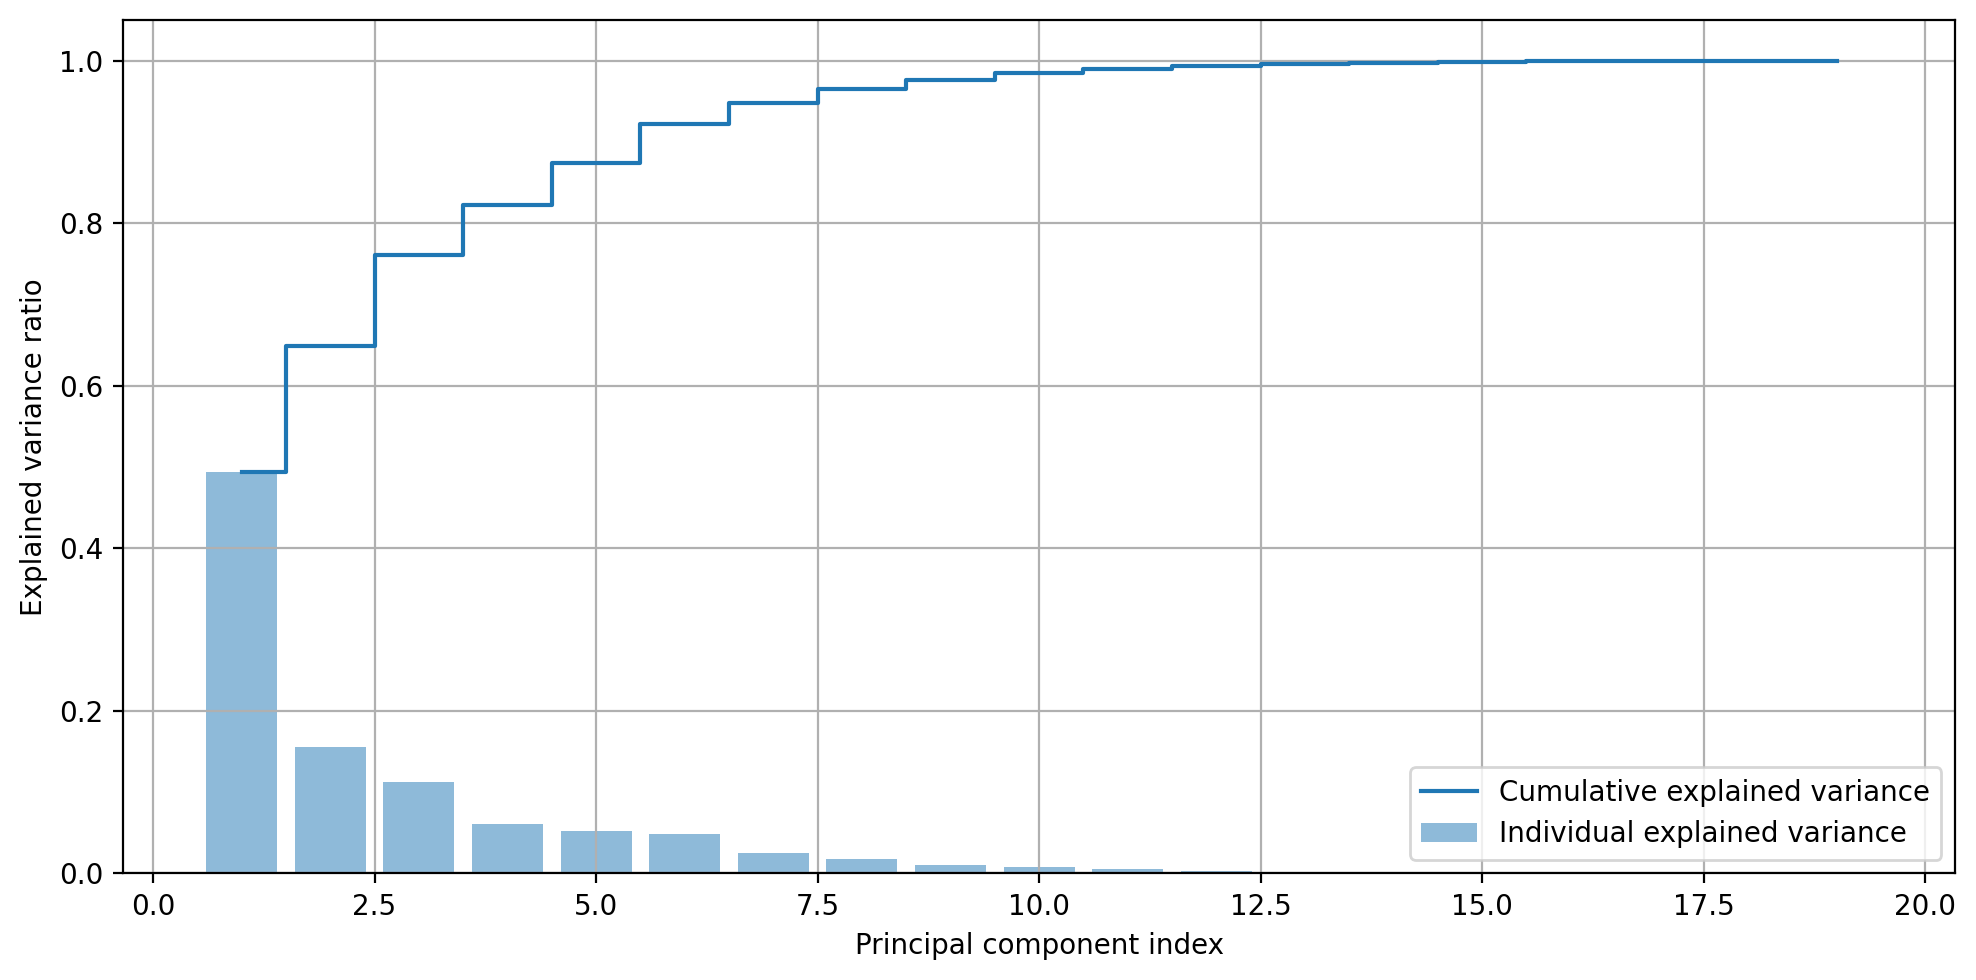

In [19]:
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.grid()
plt.tight_layout()
plt.show()

Индивидуальная и накопленная объясненная дисперсия используются для определения оптимального числа главных компонентов. Накопленная объясненная дисперсия показывает накопление дисперсии для каждого числа главных компонентов. Индивидуальная объясненная дисперсия описывает дисперсию каждого главного компонента.

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

Понижение размерности может потенциально повысить скорость обучения модели, так как были убраны признаки, несущие минимальное количество информации. Однако, здесь у нас небольшой датасет, поэтому заметить разницу в скорости обучения моделей будет сложно.

Судя по графику более 16 нет смысла брать, потому что остальные несут минимум информации. Ради любопытства пробовал взять 17 accuracy модель падает, при 15 и ниже, также падает. 

In [20]:
pca = PCA(n_components=16, random_state=8)
pca.fit(X_train_std)  # Fit on training data

PCA(n_components=16, random_state=8)

In [21]:
X_train_pca = pca.transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [22]:
X_train_pca.shape, X_test_pca.shape

((549, 16), (297, 16))

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [23]:
log_reg_pca = LogisticRegression(multi_class='multinomial', 
                                 solver='saga', 
                                 tol=1e-3, 
                                 max_iter=500, 
                                 random_state=8)

In [24]:
C = np.arange(0.01, 1, 0.01)
warm_start = [True, False]
penalty = ['l1', 'l2']

param_dist_pca = {
    'C': C,  
    'warm_start': warm_start,
    'penalty': penalty
}

In [25]:
random_search_pca = RandomizedSearchCV(log_reg_pca, 
                                       param_distributions=param_dist_pca, 
                                       n_iter=100, 
                                       scoring='accuracy', 
                                       cv=3,
                                       random_state=8,
                                       n_jobs=-1)

In [26]:
random_search_pca.fit(X_train_pca, y_train)

RandomizedSearchCV(cv=3,
                   estimator=LogisticRegression(max_iter=500,
                                                multi_class='multinomial',
                                                random_state=8, solver='saga',
                                                tol=0.001),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'C': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.3...
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]),
                                        'penalty': ['l1', 'l2'],
                                        'warm_start': [True, False]},
                   random_state=8, scoring='accuracy')

In [27]:
best_model_pca = random_search_pca.best_estimator_
y_pred_train_pca = best_model_pca.predict(X_train_pca)
y_pred_test_pca = best_model_pca.predict(X_test_pca)
f1_train_pca = f1_score(y_train, y_pred_train_pca, average='weighted')
f1_test_pca = f1_score(y_test, y_pred_test_pca, average='weighted')
accuracy_train_pca = accuracy_score(y_train, y_pred_train_pca)
accuracy_test_pca = accuracy_score(y_test, y_pred_test_pca)

In [28]:
print(f"random search best params: \n{random_search_pca.best_params_}\n")
print(f"f1 train: {f1_train_pca}")
print(f"f1 test: {f1_test_pca}")
print(f"accuracy train: {accuracy_train_pca}")
print(f"accuracy test: {accuracy_test_pca}")

random search best params: 
{'warm_start': False, 'penalty': 'l1', 'C': 0.5700000000000001}

f1 train: 0.7772575040784285
f1 test: 0.8080673214663661
accuracy train: 0.7814207650273224
accuracy test: 0.8114478114478114


С уменьшенным количеством фич, на тесте удалось немного поднять accuracy до 0.812

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [30]:
decision_tree = DecisionTreeClassifier(random_state=8)

In [31]:
max_features = ['sqrt', 'log2']
max_depth = range(1, 100)
criterion = ['gini', 'entropy', 'log_loss']
splitter = ['best', 'random']
min_samples_split = range(2, 11)

param_grid = {
    'max_features': max_features,
    'max_depth': max_depth,
    'criterion': criterion,
    'min_samples_split': min_samples_split
}

In [32]:
grid_search = GridSearchCV(decision_tree, 
                           param_grid, 
                           scoring='accuracy', 
                           cv=10)

In [33]:
grid_search.fit(X_train_pca, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=8),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(1, 100),
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': range(2, 11)},
             scoring='accuracy')

In [34]:
best_tree_model = grid_search.best_estimator_
y_pred_train_tree = best_tree_model.predict(X_train_pca)
y_pred_test_tree = best_tree_model.predict(X_test_pca)

f1_train_tree = f1_score(y_train, y_pred_train_tree, average='weighted')
f1_test_tree = f1_score(y_test, y_pred_test_tree, average='weighted')
accuracy_train_tree = accuracy_score(y_train, y_pred_train_tree)
accuracy_test_tree = accuracy_score(y_test, y_pred_test_tree)

In [35]:
print(f"grid search best params: \n{grid_search.best_params_}\n")
print(f"f1 train: {f1_train_tree}")
print(f"f1 test: {f1_test_tree}")
print(f"accuracy train: {accuracy_train_tree}")
print(f"accuracy test: {accuracy_test_tree}")

grid search best params: 
{'criterion': 'entropy', 'max_depth': 14, 'max_features': 'sqrt', 'min_samples_split': 3}

f1 train: 0.979931309860695
f1 test: 0.6360874766671869
accuracy train: 0.9799635701275046
accuracy test: 0.6296296296296297


Довольно любопытно высокое значение метрик на test датасете и довольно низкое на train.

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [36]:
from sklearn.ensemble import BaggingClassifier

n_estimators_range = range(2, 103, 5)

f1_scores_lr, accuracies_lr = [], []
f1_scores_dt, accuracies_dt = [], []

lr = LogisticRegression(random_state=8)

# logistic regression cycle
for n_estimators in n_estimators_range:
    bagging_lr = BaggingClassifier(base_estimator=lr, 
                                   n_estimators=n_estimators, 
                                   random_state=8,
                                   max_samples=n_estimators,
                                   n_jobs=-1)
    bagging_lr.fit(X_train_pca, y_train)
    y_pred = bagging_lr.predict(X_test_pca)
    f1_scores_lr.append(f1_score(y_test, y_pred, average='weighted'))
    accuracies_lr.append(accuracy_score(y_test, y_pred))

dt = DecisionTreeClassifier(random_state=8)

# tree cycle
for n_estimators in n_estimators_range:
    bagging_dt = BaggingClassifier(base_estimator=dt, 
                                   n_estimators=n_estimators, 
                                   random_state=8, 
                                   max_samples=n_estimators,
                                   n_jobs=-1)
    bagging_dt.fit(X_train_pca, y_train)
    y_pred = bagging_dt.predict(X_test_pca)
    f1_scores_dt.append(f1_score(y_test, y_pred, average='weighted'))
    accuracies_dt.append(accuracy_score(y_test, y_pred))

In [37]:
max_f1_idx = np.argmax(f1_scores_lr)
max_acc_idx = np.argmax(accuracies_lr)
print(f"max f1 score: {f1_scores_lr[max_f1_idx]} with {n_estimators_range[max_f1_idx]} estimators")
print(f"max accuracy score: {accuracies_lr[max_acc_idx]} with {n_estimators_range[max_acc_idx]} estimators")

max f1 score: 0.7826998082991158 with 97 estimators
max accuracy score: 0.7878787878787878 with 92 estimators


In [38]:
max_f1_idx = np.argmax(f1_scores_dt)
max_acc_idx = np.argmax(accuracies_dt)
print(f"max f1 score: {f1_scores_dt[max_f1_idx]} with {n_estimators_range[max_f1_idx]} estimators")
print(f"max accuracy score: {accuracies_dt[max_acc_idx]} with {n_estimators_range[max_acc_idx]} estimators")

max f1 score: 0.7972651748102777 with 87 estimators
max accuracy score: 0.8013468013468014 with 87 estimators


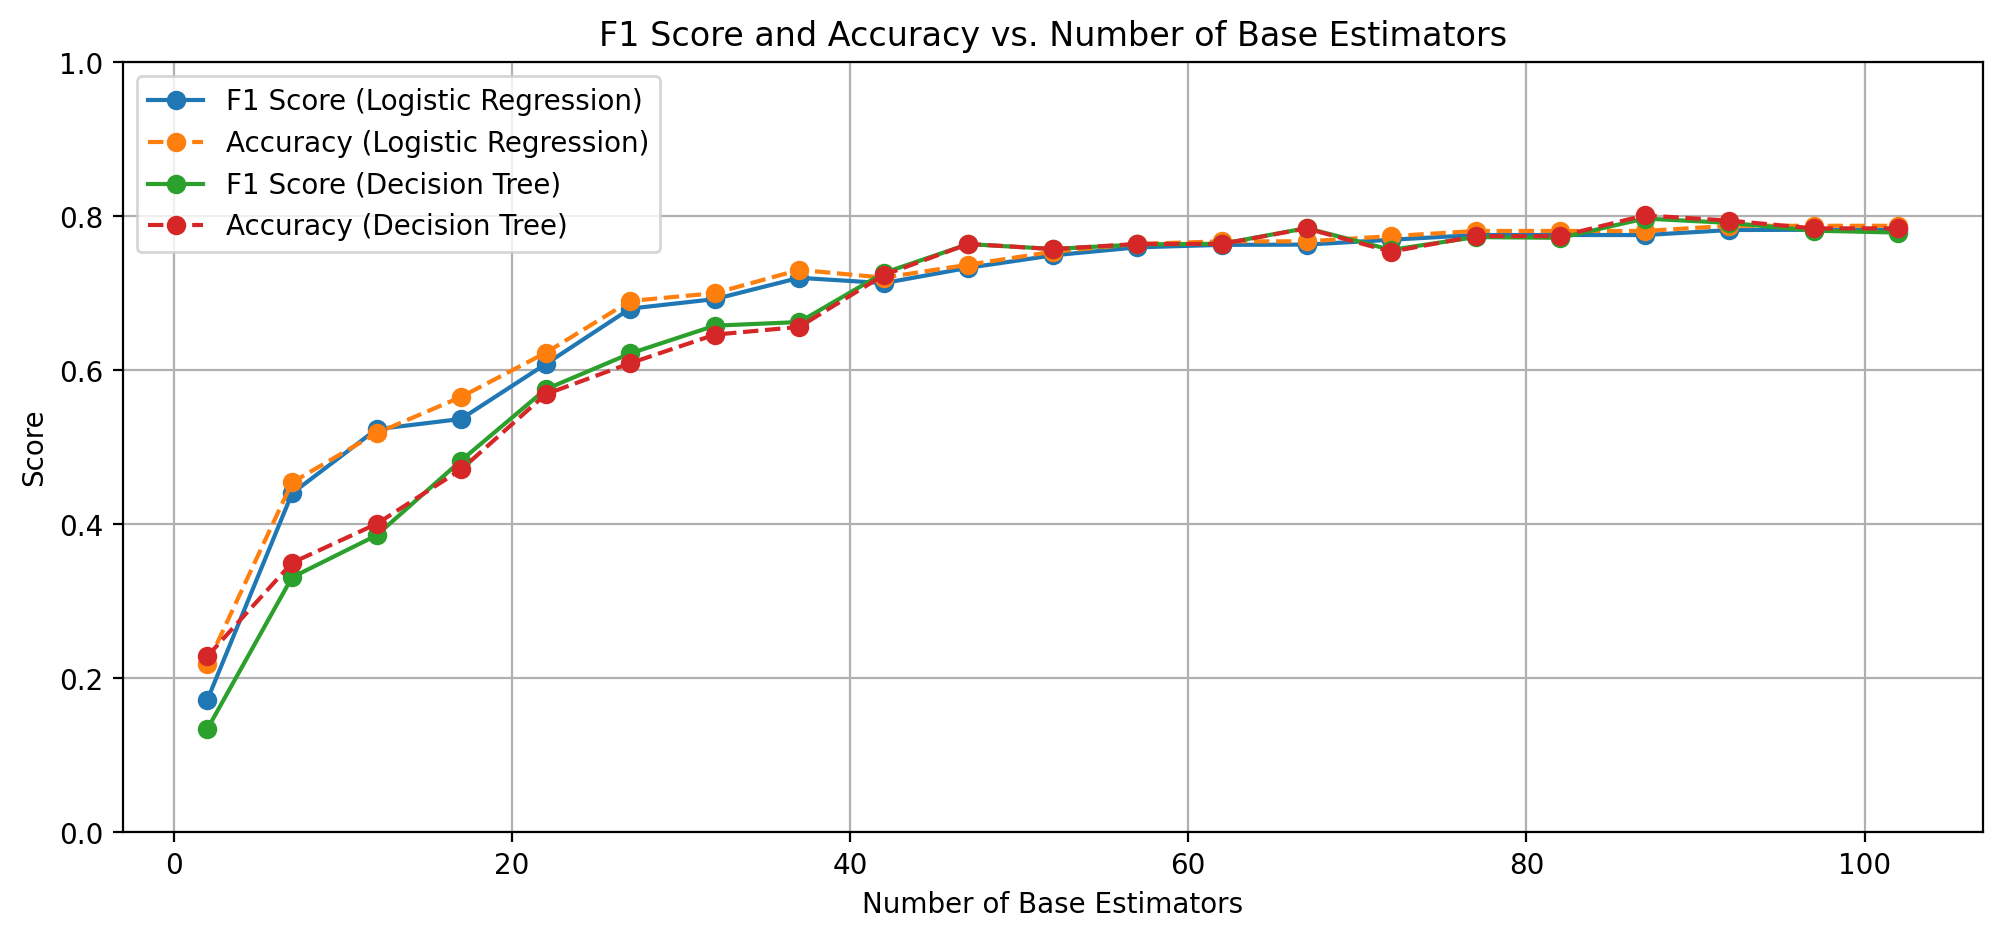

In [39]:
n_estimators_list = list(range(2, 103, 5))

plt.figure(figsize=(12, 5))

# F1 Scores for Logistic Regression
plt.plot(n_estimators_list, f1_scores_lr, label='F1 Score (Logistic Regression)', marker='o', linestyle='-')

# Accuracies for Logistic Regression
plt.plot(n_estimators_list, accuracies_lr, label='Accuracy (Logistic Regression)', marker='o', linestyle='--')

# F1 Scores for Decision Tree
plt.plot(n_estimators_list, f1_scores_dt, label='F1 Score (Decision Tree)', marker='o', linestyle='-')

# Accuracies for Decision Tree
plt.plot(n_estimators_list, accuracies_dt, label='Accuracy (Decision Tree)', marker='o', linestyle='--')
plt.ylim([0,1])
plt.xlabel('Number of Base Estimators')
plt.ylabel('Score')
plt.title('F1 Score and Accuracy vs. Number of Base Estimators')
plt.legend()
plt.grid(True)
plt.show()

На графике явно видно, что обе модели с BaggingClassifier выдают приблизительно одинаковый результат.

Максимальный accuracy 0.787 достигается у LogisticRegression при 97 эстиматорах.

Максимальный accuracy 0.801 достигается у DecisionTreeClassifier при 87 эстиматорах.

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [40]:
from sklearn.ensemble import RandomForestClassifier

n_estimators_range = range(2, 103, 5)

f1_scores_rfс, accuracies_rfс = [], []

for n_estimators in n_estimators_range:
    rfc = RandomForestClassifier(n_estimators, n_jobs=-1, random_state=8, max_depth=10)
    rfc.fit(X_train_pca, y_train)
    y_pred_rfс = rfc.predict(X_test_pca)
    f1_scores_rfс.append(f1_score(y_test, y_pred_rfс, average='weighted'))
    accuracies_rfс.append(accuracy_score(y_test, y_pred_rfс))

In [41]:
max_f1_idx = np.argmax(f1_scores_rfс)
max_acc_idx = np.argmax(accuracies_rfс)
print(f"max f1 score: {f1_scores_rfс[max_f1_idx]} with {n_estimators_range[max_f1_idx]} estimators")
print(f"max accuracy score: {accuracies_rfс[max_acc_idx]} with {n_estimators_range[max_acc_idx]} estimators")

max f1 score: 0.7914664760458241 with 102 estimators
max accuracy score: 0.7946127946127947 with 102 estimators


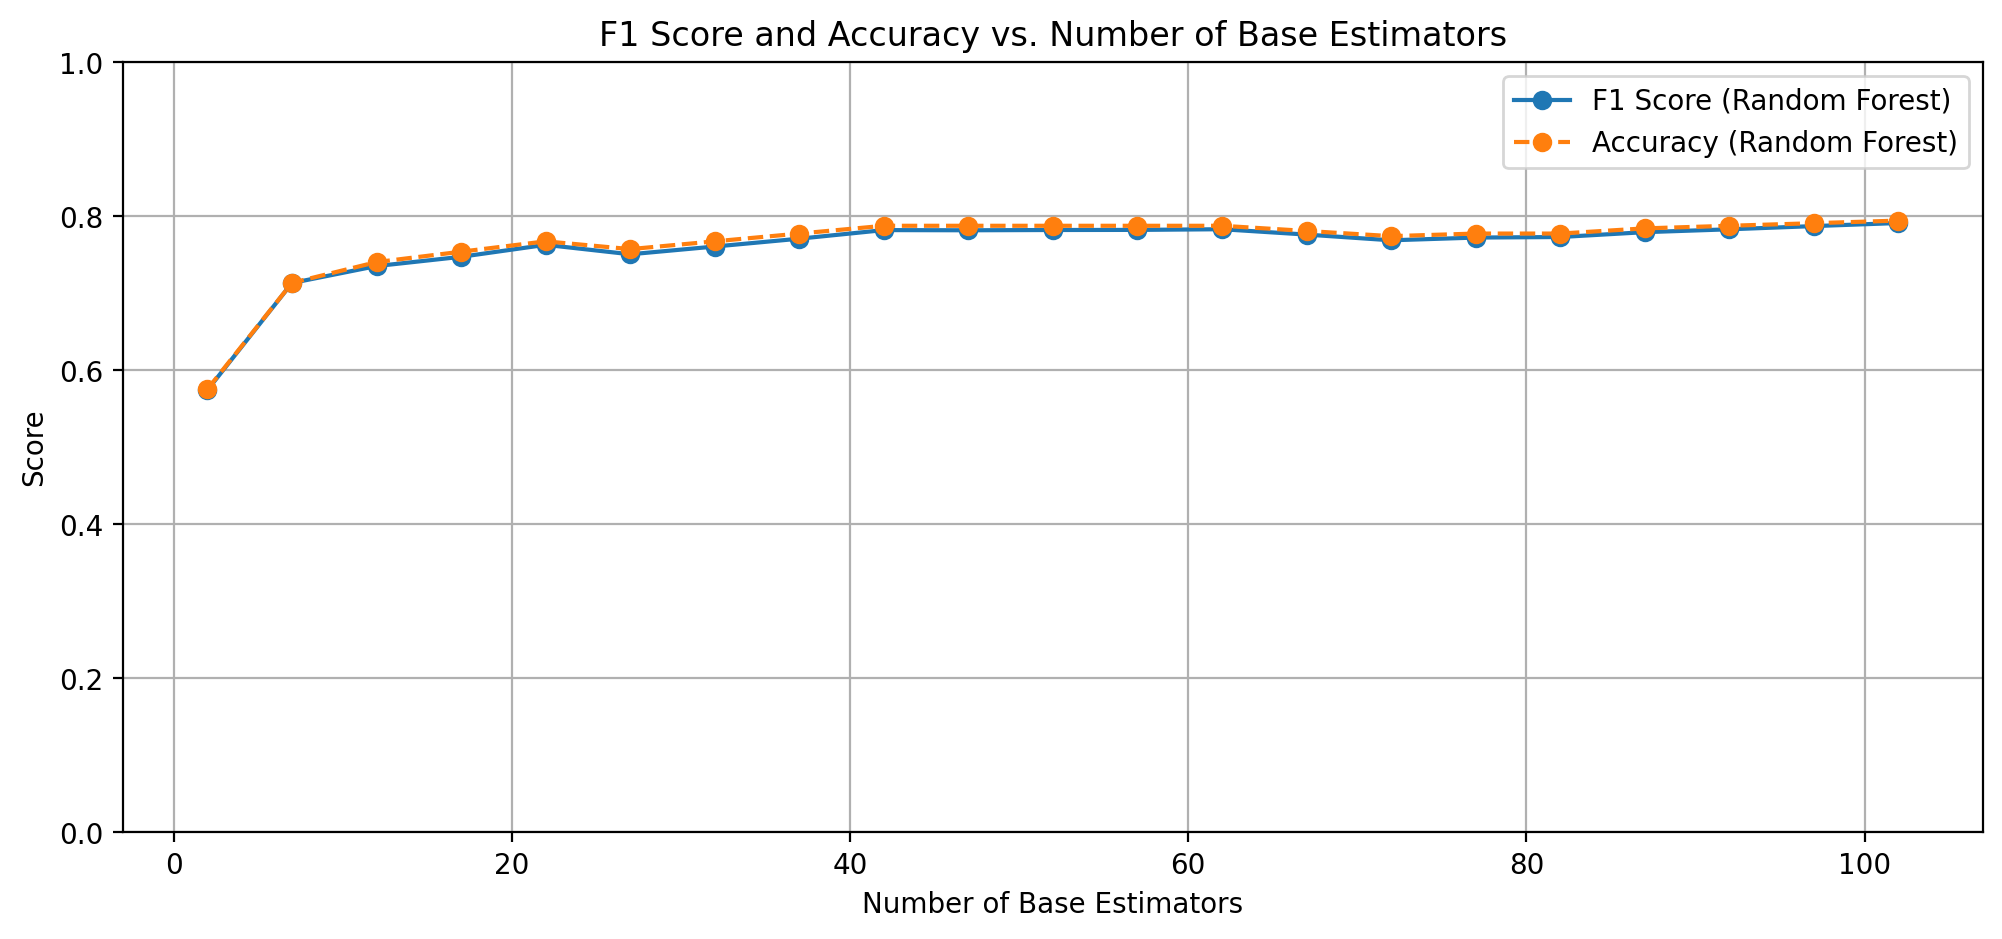

In [42]:
n_estimators_list = list(range(2, 103, 5))

plt.figure(figsize=(12, 5))

# F1 Scores for Random Forest
plt.plot(n_estimators_list, f1_scores_rfс, label='F1 Score (Random Forest)', marker='o', linestyle='-')

# Accuracies for Random Forest
plt.plot(n_estimators_list, accuracies_rfс, label='Accuracy (Random Forest)', marker='o', linestyle='--')
plt.ylim([0,1])
plt.xlabel('Number of Base Estimators')
plt.ylabel('Score')
plt.title('F1 Score and Accuracy vs. Number of Base Estimators')
plt.legend()
plt.grid(True)
plt.show()

Если ориентироваться на метрику accuracy, то для LogisticRegression оптимальное количество эстиматоров составляет 97, для RandomForestClassifier — 102. 

По графику видно, что существенный прирост качества RandomForestClassifier прекращается после 42, фактически выходя на плато.

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [43]:
num_splits = 10
rows = X_train_pca.shape[0]
split_size = rows // num_splits
extra = rows % num_splits

indices = [0]
for i in range(num_splits):
    if i < extra:
        indices.append(indices[-1] + split_size + 1)
    else:
        indices.append(indices[-1] + split_size)

In [44]:
f1_scores_lr, accuracies_lr = [], []

for i in range(1, num_splits+1):
    lr = LogisticRegression(multi_class='multinomial', 
                            solver='saga', 
                            tol=1e-3, 
                            max_iter=500, 
                            random_state=8,
                            warm_start=random_search_pca.best_params_['warm_start'],
                            penalty=random_search_pca.best_params_['penalty'],
                            C=random_search_pca.best_params_['C']
                            )
    c_idx = indices[0]
    n_idx = indices[i]
    lr.fit(X_train_pca[c_idx:n_idx, :], y_train[c_idx:n_idx])
    y_pred = lr.predict(X_test_pca[c_idx:n_idx, :])
    f1_scores_lr.append(f1_score(y_test[c_idx:n_idx], y_pred, average='weighted'))
    accuracies_lr.append(accuracy_score(y_test[c_idx:n_idx], y_pred))

In [45]:
max_f1_idx = np.argmax(f1_scores_lr)
max_acc_idx = np.argmax(accuracies_lr)
print(f"max f1 score: {f1_scores_lr[max_f1_idx]} with {max_f1_idx + 1} parts")
print(f"max accuracy score: {accuracies_lr[max_acc_idx]} with {max_acc_idx} parts")

max f1 score: 0.8128824559005526 with 9 parts
max accuracy score: 0.8148148148148148 with 8 parts


In [46]:
f1_scores_dt, accuracies_dt = [], []

for i in range(1, num_splits+1):
    dt = DecisionTreeClassifier(random_state=8,
                                criterion=grid_search.best_estimator_.criterion,
                                max_depth=grid_search.best_estimator_.max_depth,
                                max_features=grid_search.best_estimator_.max_features,
                                min_samples_split=grid_search.best_estimator_.min_samples_split)

    c_idx = indices[0]
    n_idx = indices[i]
    dt.fit(X_train_pca[c_idx:n_idx, :], y_train[c_idx:n_idx])
    y_pred = dt.predict(X_test_pca[c_idx:n_idx, :])
    f1_scores_dt.append(f1_score(y_test[c_idx:n_idx], y_pred, average='weighted'))
    accuracies_dt.append(accuracy_score(y_test[c_idx:n_idx], y_pred))

In [47]:
max_f1_idx = np.argmax(f1_scores_dt)
max_acc_idx = np.argmax(accuracies_dt)
print(f"max f1 score: {f1_scores_dt[max_f1_idx]} with {max_f1_idx + 1} parts")
print(f"max accuracy score: {accuracies_dt[max_acc_idx]} with {max_acc_idx} parts")

max f1 score: 0.6360874766671869 with 10 parts
max accuracy score: 0.6296296296296297 with 9 parts


In [48]:
f1_scores_rf, accuracies_rf = [], []

for i in range(1, num_splits+1):
    rf = RandomForestClassifier(random_state=8,
                                n_estimators=77, 
                                n_jobs=-1,  
                                max_depth=10)

    c_idx = indices[0]
    n_idx = indices[i]
    rf.fit(X_train_pca[c_idx:n_idx, :], y_train[c_idx:n_idx])
    y_pred = rf.predict(X_test_pca[c_idx:n_idx, :])
    f1_scores_rf.append(f1_score(y_test[c_idx:n_idx], y_pred, average='weighted'))
    accuracies_rf.append(accuracy_score(y_test[c_idx:n_idx], y_pred))

In [49]:
max_f1_idx = np.argmax(f1_scores_rf)
max_acc_idx = np.argmax(accuracies_rf)
print(f"max f1 score: {f1_scores_rf[max_f1_idx]} with {max_f1_idx + 1} parts")
print(f"max accuracy score: {accuracies_rf[max_acc_idx]} with {max_acc_idx} parts")

max f1 score: 0.8079097970893327 with 6 parts
max accuracy score: 0.8080808080808081 with 5 parts


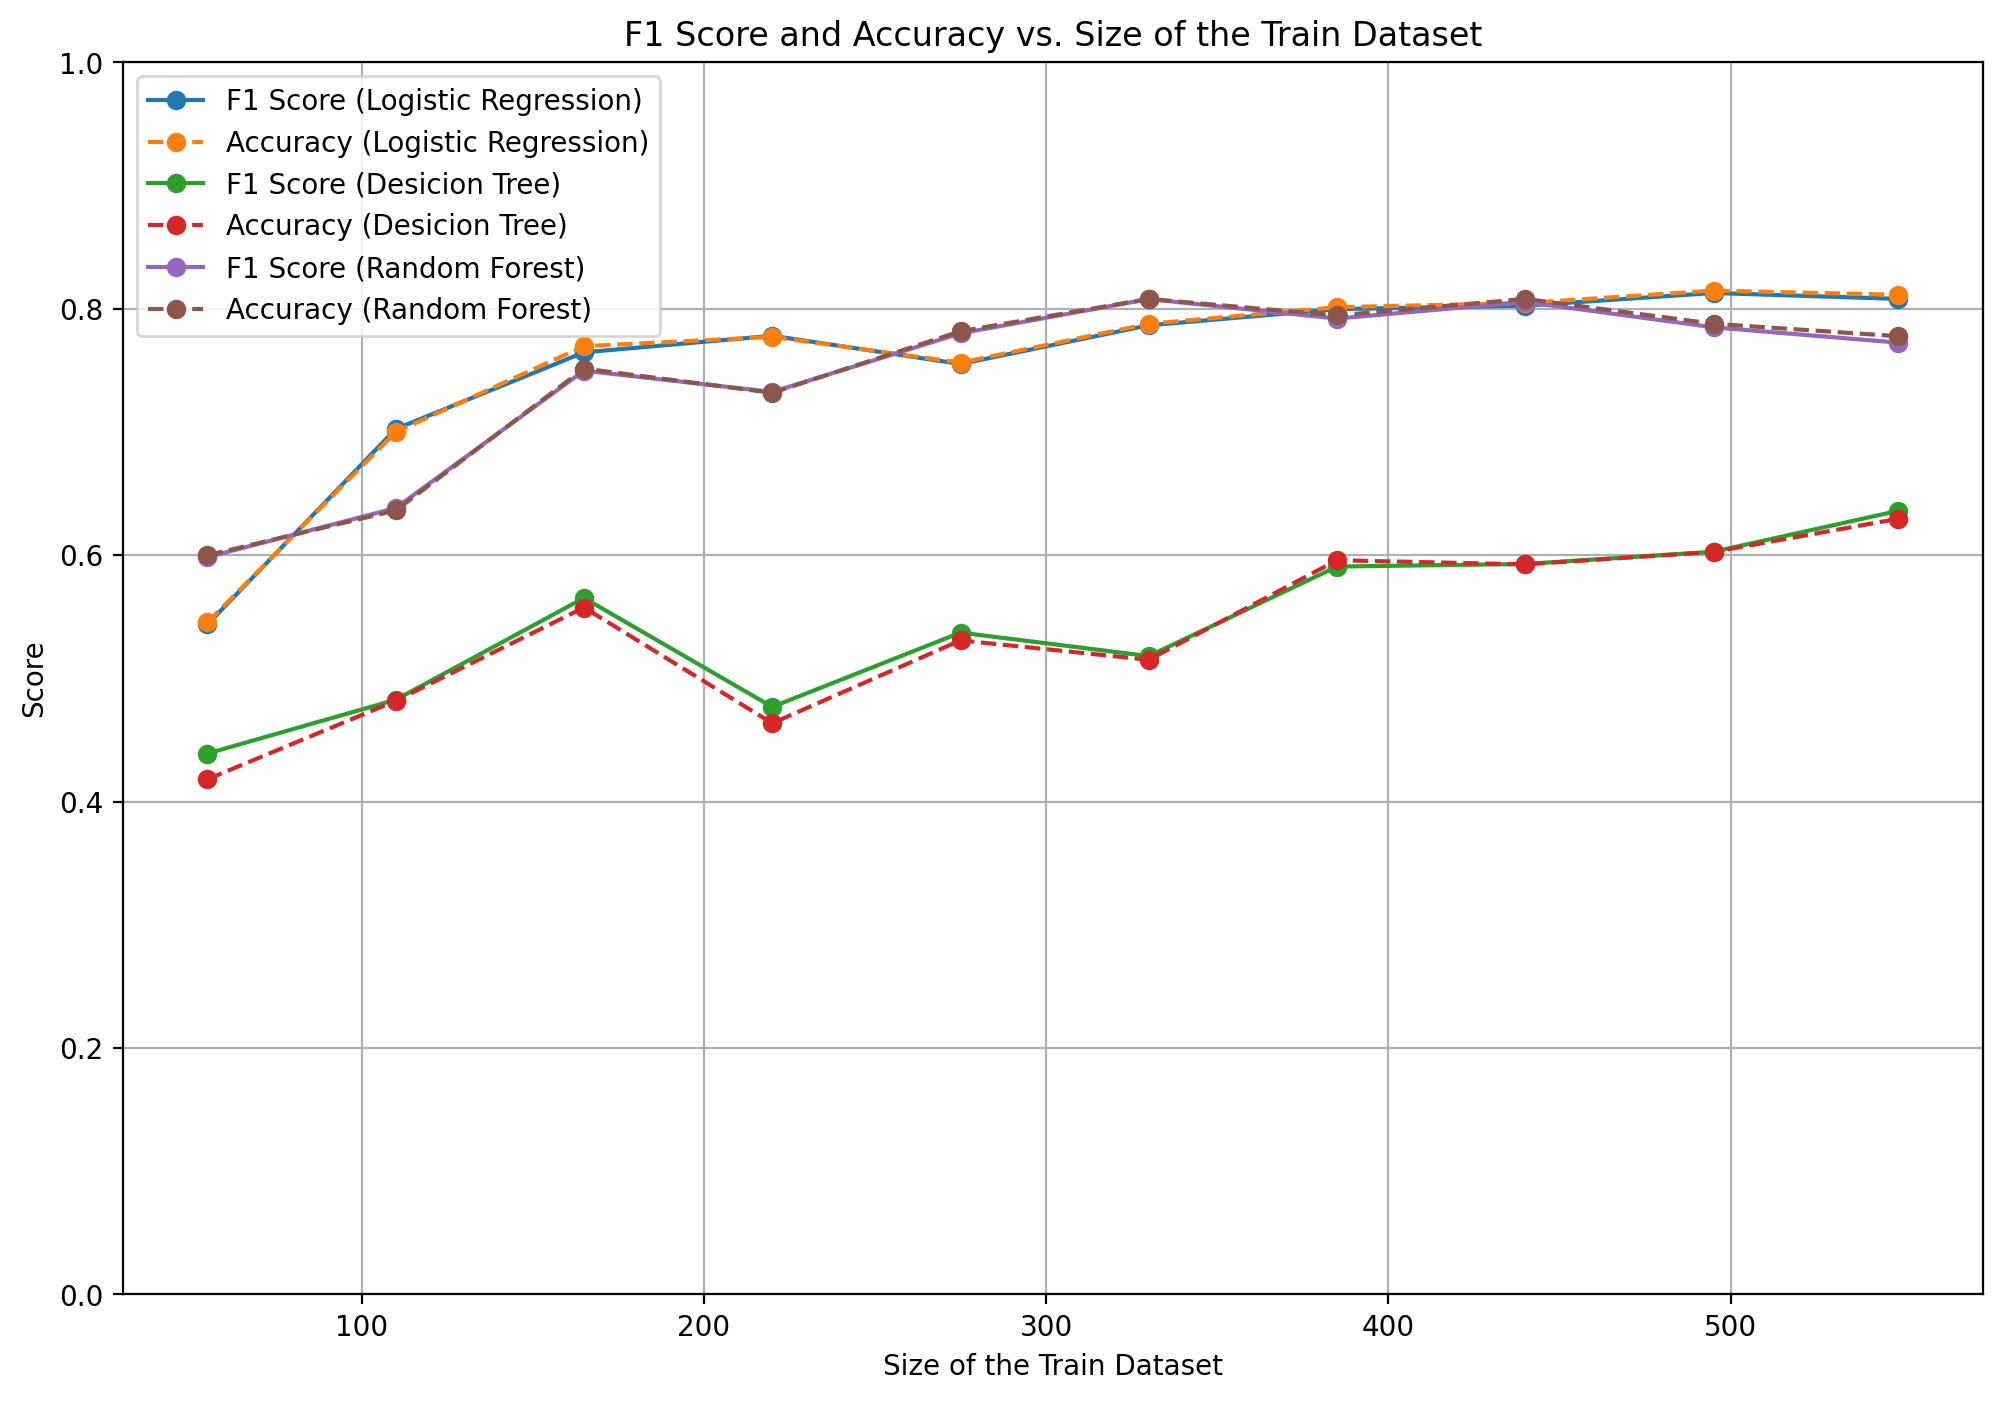

In [50]:
plt.figure(figsize=(12, 8))

# F1 Scores for Logistic Regression
plt.plot(indices[1:], f1_scores_lr, label='F1 Score (Logistic Regression)', marker='o', linestyle='-')
# Accuracies for Logistic Regression
plt.plot(indices[1:], accuracies_lr, label='Accuracy (Logistic Regression)', marker='o', linestyle='--')

# F1 Scores for Desicion Tree
plt.plot(indices[1:], f1_scores_dt, label='F1 Score (Desicion Tree)', marker='o', linestyle='-')
# Accuracies for Desicion Tree
plt.plot(indices[1:], accuracies_dt, label='Accuracy (Desicion Tree)', marker='o', linestyle='--')

# F1 Scores for Random Forest
plt.plot(indices[1:], f1_scores_rf, label='F1 Score (Random Forest)', marker='o', linestyle='-')
# Accuracies for Random Forest
plt.plot(indices[1:], accuracies_rf, label='Accuracy (Random Forest)', marker='o', linestyle='--')

plt.ylim([0,1])

plt.xlabel('Size of the Train Dataset')
plt.ylabel('Score')
plt.title('F1 Score and Accuracy vs. Size of the Train Dataset')
plt.legend()
plt.grid(True)
plt.show()

Для моделей Random Forest и Logistic Regression заметный рост происходит трехкратном увеличении размера датасета, затем рост замедляется.

Для Random Forest accuracy оказывается максимальным на половине датасета — 0.764. Для Logistic Regression максимальное качество accuracy 0.815 достигается при восьмикратном росте размера датасета.

Для модели Decision Tree максимальное качество accuracy 0.63 достигается на полном датасете.

Логистическая регрессия с подбором параметров смогла в самом начале работы получить довольно высокое значение accuracy, которое немного поднялось при применении PCA и кроссвалидации.

В целом можно сделать вывод, что применение PCA для уменьшения размерности, в некоторых случаях может помочь поднять качество работы моделей. 

Использование неполного датасета для некоторых моделей повышает предсказание на тестовом датасете. Однако из этого нельзя делать вывод, что после обучения на уменьшенном датасете модель себя покажет также высоко на валидационных или реальных данных.